# Smart Power Grid Energy Trading Data Analysis

This notebook is used to analyse the results obtained in our multi-agent simulation. These results will be used for our report. First we import necessary packages and load the data. The number of runs used for the data is manually entered.

In [138]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [139]:
# set parameters
N_RUNS = 100
N_STEPS = 365*5

# load data
data_centralised = pd.read_csv('../data/results_centralised_final.csv')
data_distributed = pd.read_csv('../data/results_distributed_final.csv')

## Average over time

We define a function that gives an average of a given column over time. We then apply this function to several values and plot them.

In [140]:
def avg_over_runs (data, col_name):
    """
    Calculates an average over a number of runs of the given column in the given dataframe
    :param data: dataframe containing data to average
    :param col_name: the column which contains the data to average
    """
    res = [0 for _ in range(N_STEPS)]

    for i in range(N_RUNS):
        curr_rewards = data.loc[data['run'] == i][col_name].values

        for j in range(N_STEPS):
            res[j] += curr_rewards[j]

    res = [x/N_RUNS for x in res]

    return pd.DataFrame(res)

## Average funds over time

We first calculate average funds over time for both simulations.

In [141]:
avg_funds_dis = avg_over_runs(data_distributed, 'average balance')
avg_funds_cen = avg_over_runs(data_centralised, 'average balance')

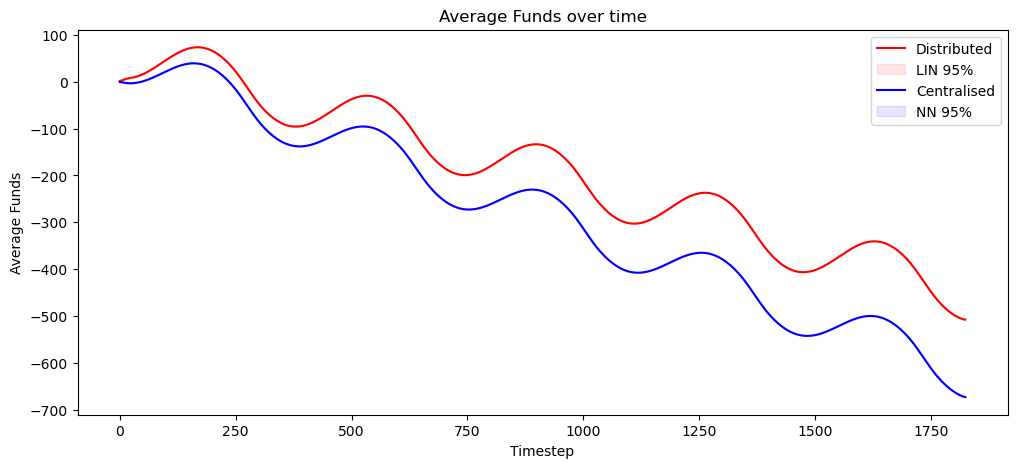

In [142]:
# plot the average funds over time for the different simulations, include standard deviation
# ref: https://stackoverflow.com/questions/70351809/python-calculate-confidence-interval-for-rolling-average-of-dataframe-entries

WS = 10
Z = 1.96

x_range = [i for i in range(N_STEPS)]

avg_funds_dis = pd.DataFrame(avg_funds_dis)
avg_funds_cen = pd.DataFrame(avg_funds_cen)



movMean_dis = avg_funds_dis.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStd_dis = avg_funds_dis.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confInt_dis = Z * movStd_dis / np.sqrt(WS)

movMean_cen = avg_funds_cen.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStd_cen = avg_funds_cen.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confInt_cen = Z * movStd_cen / np.sqrt(WS)


plt.figure(figsize=(12,5))
plt.plot(movMean_dis, label='Distributed', color='r')
plt.fill_between(x_range, movMean_dis - confInt_dis, movMean_dis + confInt_dis,
                 color='r', alpha=.1, label='LIN 95%')
plt.plot(movMean_cen, label='Centralised', color='b')
plt.fill_between(x_range, movMean_cen - confInt_cen, movMean_cen + confInt_cen,
                 color='b', alpha=.1, label='NN 95%')

plt.title('Average Funds over time')
plt.ylabel('Average Funds')
plt.xlabel('Timestep')
plt.legend()
plt.show()

Final funds distributed: [-693.4060711058065, -732.838191832524, -760.5837526091191, -727.8341867547663, -372.019281541663, -523.7791105063405, -520.1932050241528, -794.8299629229156, -450.49693217455547, -584.9896773171002, -585.3891919941651, -619.7192312894673, -544.7138624946235, -375.77186484488607, -562.8424402102643, -619.3820485034524, -418.8134362008848, -570.5063494693838, -512.8177039050325, -506.1631334785249, -452.5402866668562, -615.3974739008752, -660.234613921955, -481.5380826765667, -392.36729004328447, -447.5661829189586, -298.0365965549013, -710.1756216805562, -261.094208228562, -521.8623145125371, -354.8071128000595, -497.7530601046926, -426.2743595190824, -521.4499143286787, -595.8023592526607, -507.7132936478906, -416.18811346088376, -265.8224222906378, -457.8861952877498, -890.344158003076, -707.7844929103011, -763.4927775608782, -516.2218197108267, -242.73183205901177, -444.6856622643534, 29.2878649658014, -171.03113621029598, -294.39438514089585, -318.807248573

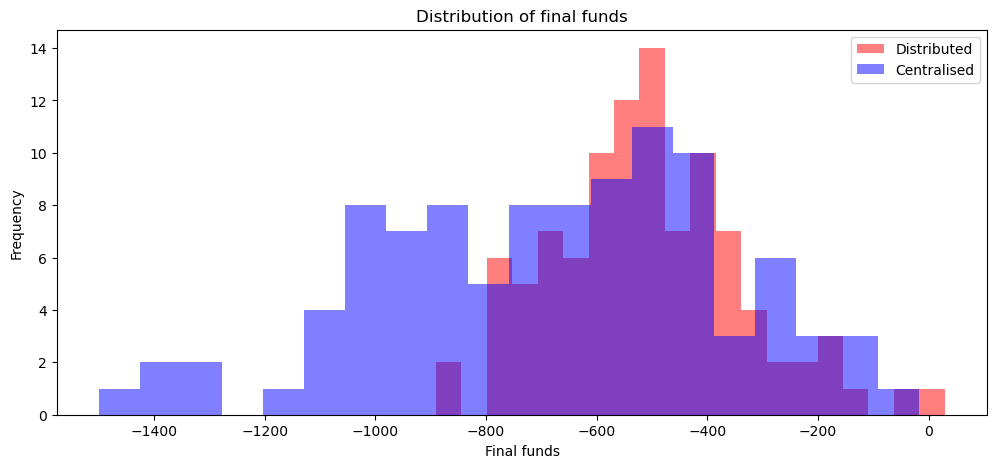

In [143]:
#Statistical tests
from scipy.stats import ttest_ind

# t-test for the average funds at the end of the simulation

#create a list of the final funds for each run
final_funds_dis = [data_distributed.loc[data_distributed['run'] == i]['average balance'].values[-1] for i in range(N_RUNS)]
print('Final funds distributed:', final_funds_dis)
print('Mean final funds distributed:', np.mean(final_funds_dis))
print(len(final_funds_dis))

final_funds_cen = [data_centralised.loc[data_centralised['run'] == i]['average balance'].values[-1] for i in range(N_RUNS)]
print('Final funds centralised:', final_funds_cen)
print('Mean final funds centralised:', np.mean(final_funds_cen))
print(len(final_funds_cen))

#perform t-test
t_stat, p_val = ttest_ind(final_funds_dis, final_funds_cen)
print('T-statistic:', t_stat)
print('P-value:', p_val)

#plot the distribution of the final funds
plt.figure(figsize=(12,5))
plt.hist(final_funds_dis, bins=20, alpha=0.5, color='r', label='Distributed')
plt.hist(final_funds_cen, bins=20, alpha=0.5, color='b', label='Centralised')
plt.title('Distribution of final funds')
plt.xlabel('Final funds')
plt.ylabel('Frequency')
plt.legend()



## Energy vs Time in Distributed Simulation

Here we graph the relationship between energy production and price in the distributed simulation. 

In [144]:
avg_energy_produced = avg_over_runs(data_distributed, 'total energy produced')
avg_price = avg_over_runs(data_distributed, 'average price')

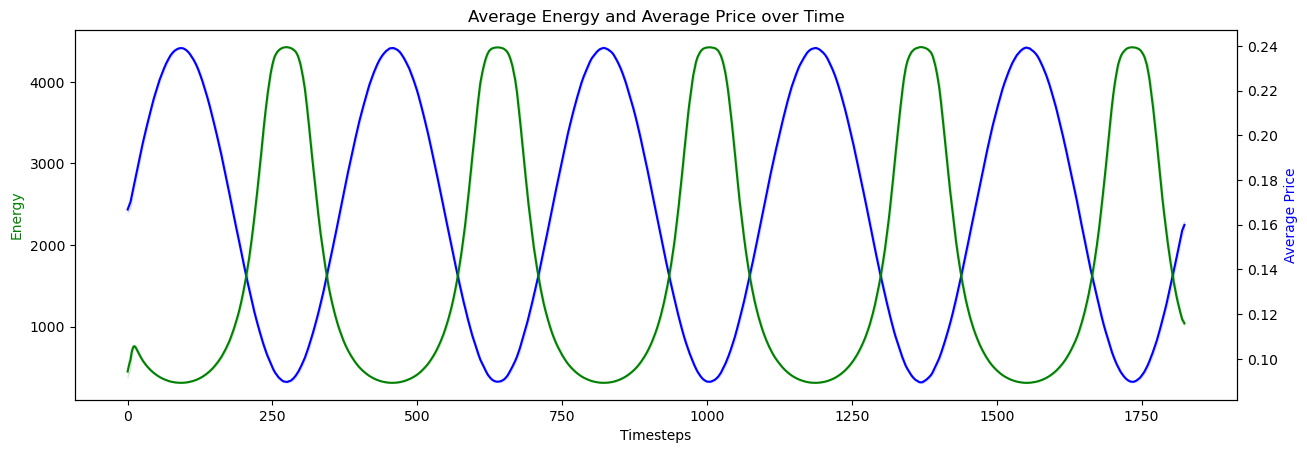

In [145]:
# plot the average funds over time for the different simulations, include standard deviation
# ref: https://stackoverflow.com/questions/70351809/python-calculate-confidence-interval-for-rolling-average-of-dataframe-entries

WS = 10
Z = 1.96

x_range = [i for i in range(N_STEPS)]

avg_energy_produced = pd.DataFrame(avg_energy_produced)
avg_price = pd.DataFrame(avg_price)



movMean_energy = avg_energy_produced.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStd_energy = avg_energy_produced.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confInt_energy = Z * movStd_energy / np.sqrt(WS)

movMean_price = avg_price.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStd_price = avg_price.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confInt_price = Z * movStd_price / np.sqrt(WS)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_figwidth(15)
# plt.figure(figsize=(12,5))

ax1.plot(movMean_energy, label='Energy', color='b')
ax1.fill_between(x_range, movMean_energy - confInt_energy, movMean_energy + confInt_energy,
                 color='b', alpha=.1, label='LIN 95%')
ax2.plot(movMean_price, label='Average price', color='g')
ax2.fill_between(x_range, movMean_price - confInt_price, movMean_price + confInt_price,
                 color='g', alpha=.1, label='NN 95%')

ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Energy', color='g')
#ax1.set_ylim(0, 2)
ax2.set_ylabel('Average Price', color='b')

plt.title('Average Energy and Average Price over Time')
plt.show()

## Proportion of Green Energy
Here we plot the proportion of green energy that is used in the grid. This is done by stating energy bought from the central distributor is grey energy as we cannot be certain how it was produced.

In [146]:
avg_demand = avg_over_runs(data_distributed, 'total energy demand')
avg_grey = avg_over_runs(data_distributed, 'total central energy bought')

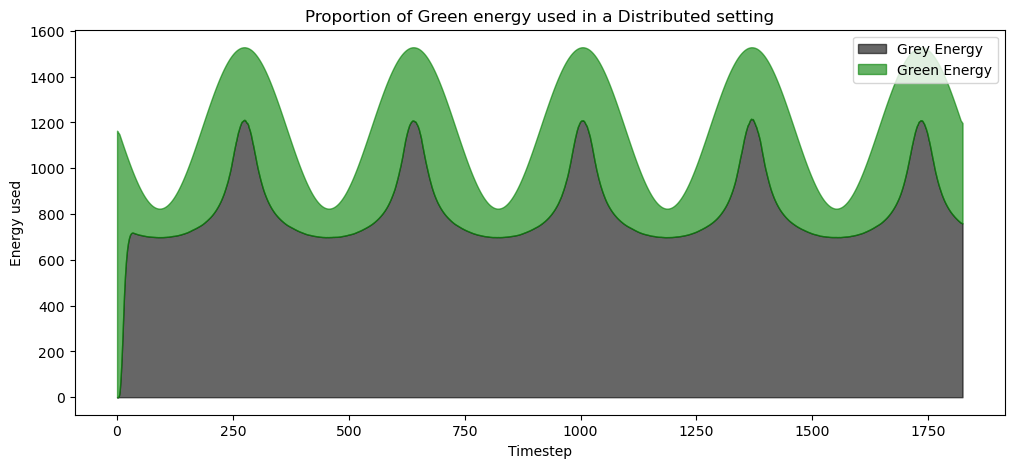

In [147]:
WS = 10

x_range = [i for i in range(N_STEPS)]

avg_demand= pd.DataFrame(avg_demand)
avg_grey = pd.DataFrame(avg_grey)

movMean_demand = avg_demand.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()

movMean_grey = avg_grey.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()

plt.figure(figsize=(12,5))
# plt.plot(movMean_grey, label='Grey Energy', color='k')
plt.fill_between(x_range, 0, movMean_grey,
                 color='k', alpha=.6, label='Grey Energy')
# plt.plot(movMean_demand, label='Green Energy', color='g')
plt.fill_between(x_range, movMean_grey, movMean_demand,
                 color='g', alpha=.6, label='Green Energy')

plt.title('Proportion of Green energy used in a Distributed setting')
plt.ylabel('Energy used')
plt.xlabel('Timestep')
plt.legend()
plt.show()

In [148]:
avg_demand = avg_over_runs(data_centralised, 'total energy demand')
avg_grey = avg_over_runs(data_centralised, 'total central energy bought')

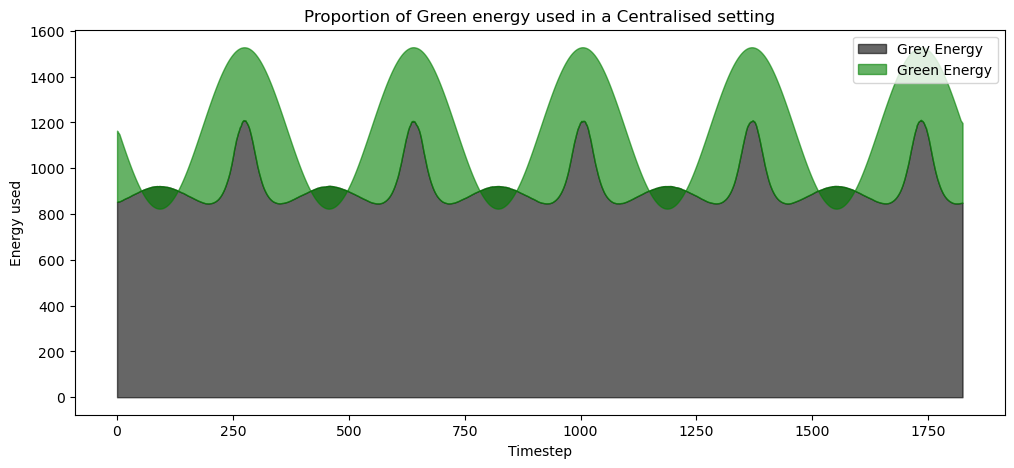

In [149]:
WS = 10

x_range = [i for i in range(N_STEPS)]

avg_demand= pd.DataFrame(avg_demand)
avg_grey = pd.DataFrame(avg_grey)

movMean_demand = avg_demand.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()

movMean_grey = avg_grey.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()

plt.figure(figsize=(12,5))
# plt.plot(movMean_grey, label='Grey Energy', color='k')
plt.fill_between(x_range, 0, movMean_grey,
                 color='k', alpha=.6, label='Grey Energy')
# plt.plot(movMean_demand, label='Green Energy', color='g')
plt.fill_between(x_range, movMean_grey, movMean_demand,
                 color='g', alpha=.6, label='Green Energy')

plt.title('Proportion of Green energy used in a Centralised setting')
plt.ylabel('Energy used')
plt.xlabel('Timestep')
plt.legend()
plt.show()

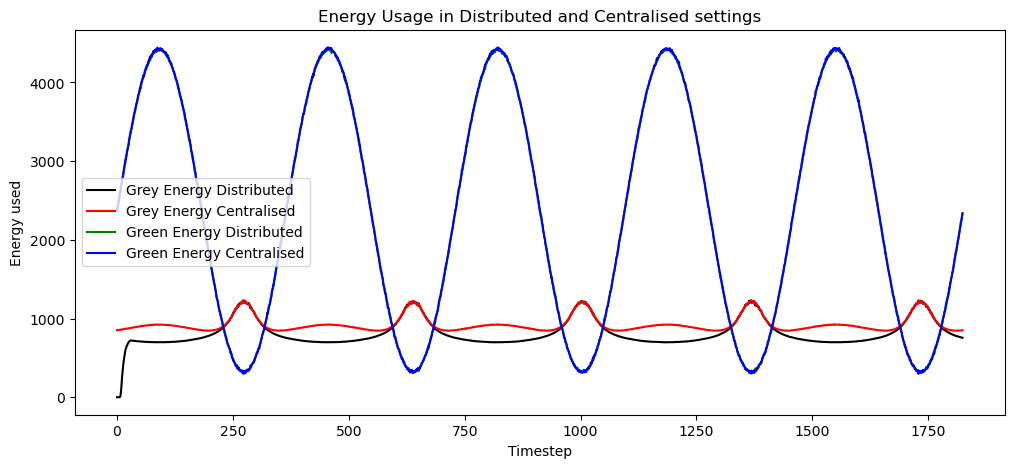

In [150]:
#compare energy usage in the two settings
avg_grey_dis = avg_over_runs(data_distributed, 'total central energy bought')
avg_grey_cen = avg_over_runs(data_centralised, 'total central energy bought')

avg_energy_produced_dis = avg_over_runs(data_distributed, 'total energy produced')
avg_energy_produced_cen = avg_over_runs(data_centralised, 'total energy produced')

plt.figure(figsize=(12,5))
plt.plot(avg_grey_dis, label='Grey Energy Distributed', color='k')
plt.plot(avg_grey_cen, label='Grey Energy Centralised', color='r')
plt.plot(avg_energy_produced_dis, label='Green Energy Distributed', color='g')
plt.plot(avg_energy_produced_cen, label='Green Energy Centralised', color='b')

plt.title('Energy Usage in Distributed and Centralised settings')
plt.ylabel('Energy used')
plt.xlabel('Timestep')
plt.legend()
plt.show()

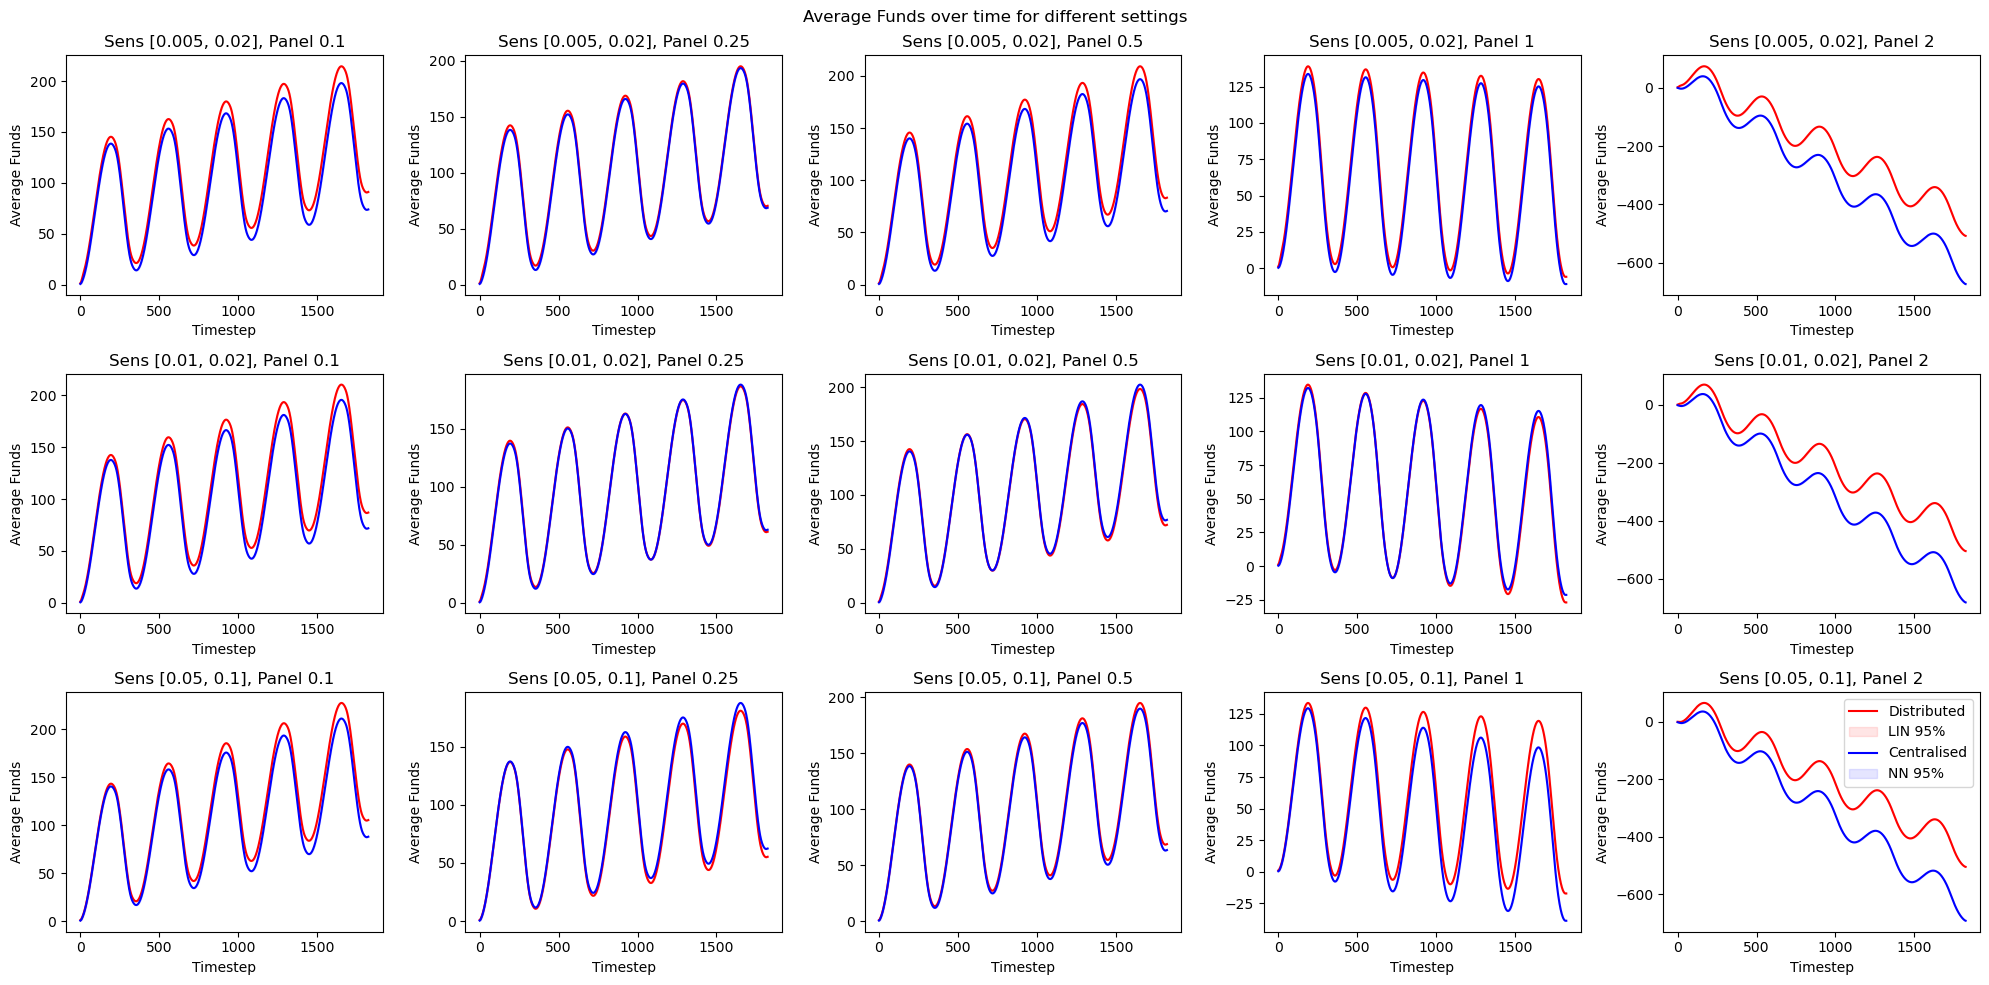

In [151]:
#grid search results
#forma: results_{mode}_sens{parameter}_panel{panel_size}_run{run}.csv
data_dis_all = []
data_cen_all = []

for sens in [[0.005, 0.02], [0.01, 0.02], [0.05, 0.1]]:
    for panel_prod in [0.1, 0.25, 0.5, 1, 2]:
        data_dis = pd.read_csv(f'../data/results_distributed_sens{sens}_panel{panel_prod}.csv')
        data_cen = pd.read_csv(f'../data/results_centralised_sens{sens}_panel{panel_prod}.csv')

        data_dis_all.append(data_dis)
        data_cen_all.append(data_cen)

#plot the average funds over time for the different simulations, include standard deviation

fig, axs = plt.subplots(3, 5, figsize=(20, 10))
fig.suptitle('Average Funds over time for different settings')

for i, sens in enumerate([[0.005, 0.02], [0.01, 0.02], [0.05, 0.1]]):
    for j, panel_prod in enumerate([0.1, 0.25, 0.5, 1, 2]):
        avg_funds_dis = avg_over_runs(data_dis_all[i * 5 + j], 'average balance')
        avg_funds_cen = avg_over_runs(data_cen_all[i * 5 + j], 'average balance')

        movMean_dis = avg_funds_dis.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
        movStd_dis = avg_funds_dis.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
        confInt_dis = Z * movStd_dis / np.sqrt(WS)

        movMean_cen = avg_funds_cen.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
        movStd_cen = avg_funds_cen.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
        confInt_cen = Z * movStd_cen / np.sqrt(WS)

        axs[i, j].plot(movMean_dis, label='Distributed', color='r')
        axs[i, j].fill_between(x_range, movMean_dis - confInt_dis, movMean_dis + confInt_dis,
                               color='r', alpha=.1, label='LIN 95%')
        axs[i, j].plot(movMean_cen, label='Centralised', color='b')
        axs[i, j].fill_between(x_range, movMean_cen - confInt_cen, movMean_cen + confInt_cen,
                               color='b', alpha=.1, label='NN 95%')

        axs[i, j].set_title(f'Sens {sens}, Panel {panel_prod}')
        axs[i, j].set_xlabel('Timestep')
        axs[i, j].set_ylabel('Average Funds')

plt.legend()
fig.tight_layout()
plt.show()

